## Dependencias 

In [1]:
import numpy as np 
import pandas as pd 
from CreditScoringToolkit import AutoCreditScoring

pd.set_option('display.max_columns',None)

## Lectura de datos 

In [2]:
data = pd.read_csv('../data/heart_disease.tab',delimiter='\t')
data.shape

(303, 14)

In [3]:
data.sample(5)

,diameter narrowing,age,gender,chest pain,rest SBP,cholesterol,fasting blood sugar > 120,rest ECG,max HR,exerc ind ang,ST by exercise,slope peak exc ST,major vessels colored,thal
202,0,57,male,non-anginal,150,126,1,normal,173,0,0.2,upsloping,1.0,reversable defect
233,0,74,female,atypical ang,120,269,0,left vent hypertrophy,121,1,0.2,upsloping,1.0,normal
98,0,52,male,atypical ang,134,201,0,normal,158,0,0.8,upsloping,1.0,normal
105,0,54,male,atypical ang,108,309,0,normal,156,0,0.0,upsloping,0.0,reversable defect
259,1,57,male,atypical ang,124,261,0,normal,141,0,0.3,upsloping,0.0,reversable defect


## Clasificación de variables 

In [4]:
varc = ['age','rest SBP','cholesterol','max HR','ST by exercise','major vessels colored']
vard = [ 'gender', 'chest pain',  'fasting blood sugar > 120', 'rest ECG', 'exerc ind ang',  'slope peak exc ST','thal']
vart = ['diameter narrowing']

In [5]:
for v in varc:
    data[v] = pd.to_numeric(data[v],errors='coerce')
for v in vard:
    data[v] =data[v].fillna('MISSING')

In [11]:
acs = AutoCreditScoring(data=data,target=vart[0],continuous_features=varc,discrete_features=vard)

2025-10-21 21:10:13,661 - CreditScoringToolkit - INFO - Partitioning data...
2025-10-21 21:10:13,664 - CreditScoringToolkit - INFO - Checking partition proportions...
2025-10-21 21:10:13,666 - CreditScoringToolkit - INFO - Partitioning data...Iteration 1
2025-10-21 21:10:13,667 - CreditScoringToolkit - INFO - Train target proportion: 0.4858490566037736
2025-10-21 21:10:13,668 - CreditScoringToolkit - INFO - Valid target proportion: 0.3956043956043956
2025-10-21 21:10:13,670 - CreditScoringToolkit - INFO - Partitioning data...Iteration 2
2025-10-21 21:10:13,670 - CreditScoringToolkit - INFO - Train target proportion: 0.4811320754716981
2025-10-21 21:10:13,670 - CreditScoringToolkit - INFO - Valid target proportion: 0.4065934065934066
2025-10-21 21:10:13,672 - CreditScoringToolkit - INFO - Partitioning data...Done after 3 iterations
2025-10-21 21:10:13,672 - CreditScoringToolkit - INFO - Train shape: (212, 14)
2025-10-21 21:10:13,673 - CreditScoringToolkit - INFO - Test shape: (91, 14)
2

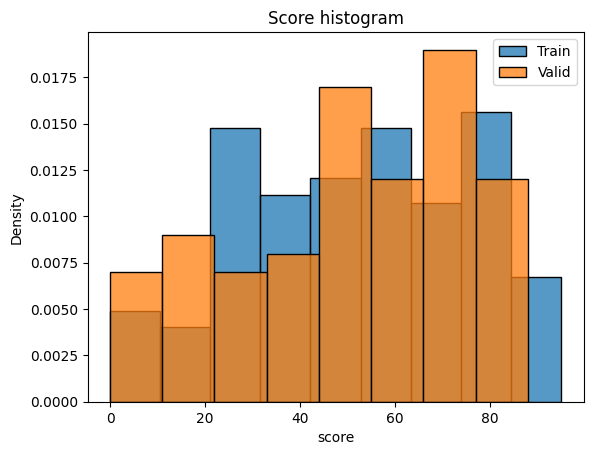

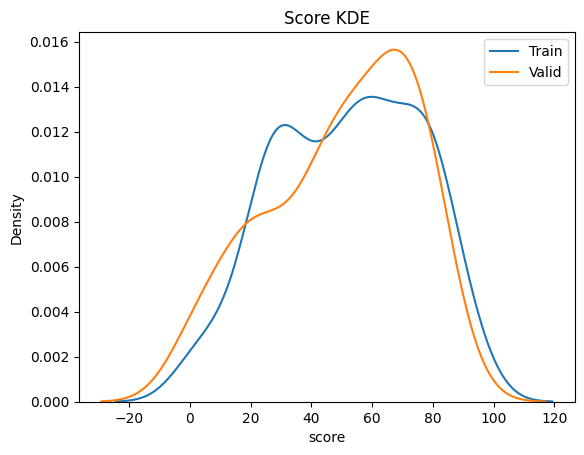

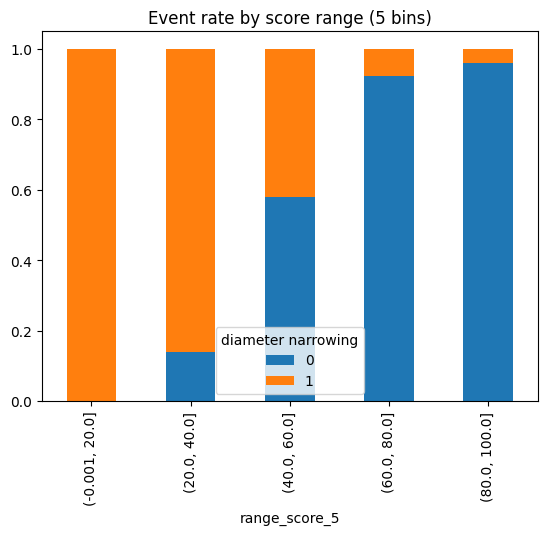

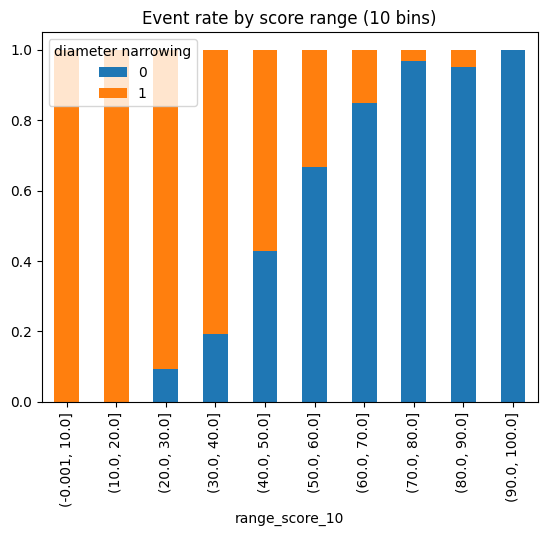

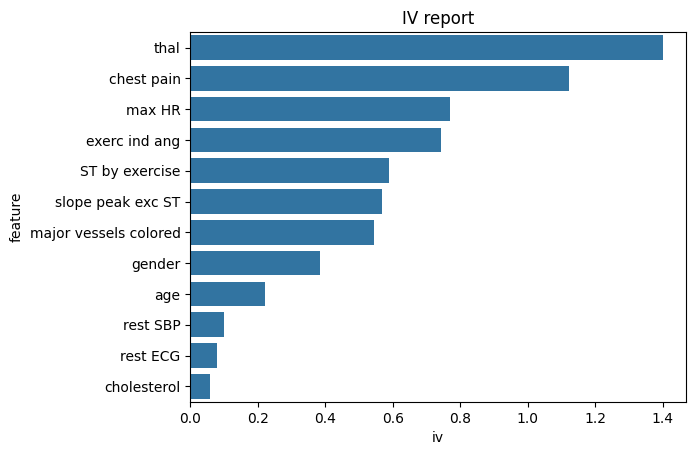

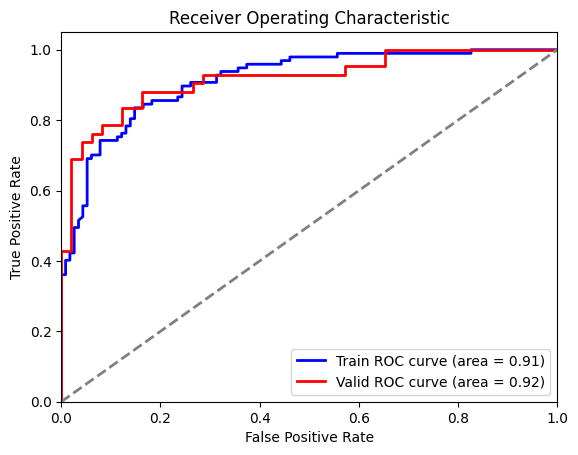

In [17]:
acs.fit(train_proportion=0.7,
        treat_outliers=True,
        max_discretization_bins=3,
        min_score=0,
        max_score=100,
        create_reporting=True,
        verbose=True,
        discretization_method='quantile'
        )

In [18]:
acs.credit_scoring.scorecard

points
feature                               attribute                    
chest pain                            asymptomatic               -1
                                      atypical ang               11
                                      non-anginal                 9
                                      typical ang                 8
disc_ST by exercise_2_quantile        (-inf, 0.8]                 7
                                      (0.8, inf]                  2
disc_age_2_quantile                   (-inf, 56.0]                5
                                      (56.0, inf]                 3
disc_cholesterol_3_quantile           (-inf, 220.0]               7
                                      (220.0, 263.0]              4
                                      (263.0, inf]                2
disc_major vessels colored_3_quantile (-inf, 1.0]                 8
                                      (1.0, inf]                -13
                                      MISSING                    10
disc_max HR_3_quantile                (-inf, 144.0]              -1
                                      (144.0, 162.0]              5
                                      (162.0, inf]               10
disc_rest SBP_3_quantile              (-inf, 125.0]               5
                                      (125.0, 140.0]              4
                                      (140.0, inf]                3
exerc ind ang                         0                           6
                                      1                          -1
gender                                female                     13
                                      male                        0
rest ECG                              left vent hypertrophy       3
                                      normal                      5
slope peak exc ST                     downsloping                 3
                                      flat                        2
                                      upsloping                   7
thal                                  fixed defect               -1
                                      normal                     11
                                      reversable defect          -3

In [23]:
aux = pd.concat([pd.concat([acs.scored_train[['range_score_5']],acs.train[vart]],axis=1).assign(sample='train').assign(n=1),
pd.concat([acs.scored_valid[['range_score_5']],acs.valid[vart]],axis=1).assign(sample='valid').assign(n=1)],ignore_index=True)

In [33]:
aux['range_score_5'] = aux['range_score_5'].astype(str)

In [37]:
aux.groupby(vart+['range_score_5','sample']).sum().to_clipboard()